<a href="https://colab.research.google.com/github/omotolani12/Data-Science-Projects/blob/main/trumpdatasentimentanalysisandmodeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tweepy
import tweepy as tw
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('/content/trump.csv')

In [ ]:
print(df.to_string()) 

                                                                                                                                                                                                                                                                                                                                                                                           text
0                                                                                                                                                   Crickets from racist, pathological liar, corrupt criminal donaldtrump on this...\r\nTrumpIsARacist\r\nTrumpsAmerica\r\nTrumpViolence\r\nTrumpIsAPos\r\nWhite supremacy is 'most lethal threat' to the US, DHS draft assessment says\r\n\r\n
1                                                                                                                                                                                                                                       

In [4]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords

import re

In [5]:
import nltk
nltk.download('stopwords')

def cleaner(tweet):
    
    # remove urls
    tweet = re.sub(r'http\S+', ' ', tweet)
    
    # remove html tags
    tweet = re.sub(r'<.*?>',' ', tweet)
    
    # remove digits
    tweet = re.sub(r'\d+',' ', tweet)
    
    # remove hashtags
    tweet = re.sub(r'#\w+',' ', tweet)
    # remove mentions
    tweet = re.sub(r'@\w+',' ', tweet)
    tweet = re.sub(r'https\S+', '', tweet)
    
    #removing stop words
    tweet = tweet.split()
    tweet = " ".join([word for word in tweet if not word in stop_words])
    
    return  tweet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
stop_words = stopwords.words('english')
df['text']=df['text'].apply(lambda x:x.lower())
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df_cleaned = df['text'].apply(cleaner)
df_cleaned.head()

0    crickets racist, pathological liar, corrupt cr...
1    update: donaldtrump dilatedpupils september wh...
2    update: donaldtrump dilatedpupils september wh...
3    doubt... donaldtrump working wealthy, average ...
4    wake donaldtrump caught tape saying intentiona...
Name: text, dtype: object

In [ ]:
def cleanTxt(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'RT\S+', '', tweet)
    tweet = re.sub(r'https\S+', '', tweet)
    
    return tweet
df['text']= df['text'].apply(cleanTxt)

df

,text
0,"Crickets from racist, pathological liar, corr..."
1,UPDATE: DonaldTrump • DilatedPupils Ale • 09 S...
2,UPDATE: DonaldTrump • DilatedPupils Ale • 09 ...
3,No doubt... donaldtrump working for the wealt...
4,In the wake of DonaldTrump being caught on ta...
...,...
2169,: Hello Twitterverse — I'll be live-tweeting ...
2170,: Hello Twitterverse — I'll be live-tweeting ...
2171,": Hey , today’s trumpdoodletuesday sketch wa..."
2172,: Hello Twitterverse — I'll be live-tweeting ...


In [8]:
df.describe()

,Subjectivity,Polarity
count,2174.000000,2174.000000
mean,0.303258,0.028956
std,0.323029,0.313305
min,0.000000,-1.000000
25%,0.000000,0.000000
50%,0.225000,0.000000
75%,0.500000,0.125000
max,1.000000,1.000000


In [7]:
def getSubjectivity(tweet):
  return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
  return TextBlob(tweet).sentiment.polarity

df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)

df

,text,Subjectivity,Polarity
0,"crickets from racist, pathological liar, corru...",0.512500,-0.100000
1,update: donaldtrump dilatedpupils september 20...,0.267857,0.142857
2,update: donaldtrump dilatedpupils september 20...,0.267857,0.142857
3,"doubt... donaldtrump working wealthy, average ...",0.466667,0.116667
4,wake donaldtrump being caught tape saying that...,0.000000,0.000000
...,...,...,...
2169,hello twitterverse i'll live-tweeting bodylang...,0.000000,0.000000
2170,hello twitterverse i'll live-tweeting bodylang...,0.000000,0.000000
2171,today’s trumpdoodletuesday sketch inspired rel...,0.000000,0.000000
2172,hello twitterverse i'll live-tweeting bodylang...,0.000000,0.000000


<function matplotlib.pyplot.show>

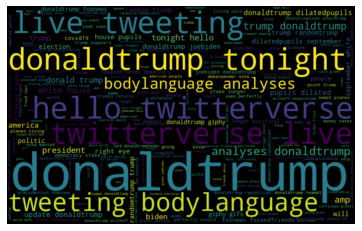

In [9]:
allWords = ' '.join( [twts for twts in df['text']] )
wordCloud = WordCloud(width = 800, height=500, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show

In [10]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,text,Subjectivity,Polarity,Analysis
0,"crickets from racist, pathological liar, corru...",0.512500,-0.100000,Negative
1,update: donaldtrump dilatedpupils september 20...,0.267857,0.142857,Positive
2,update: donaldtrump dilatedpupils september 20...,0.267857,0.142857,Positive
3,"doubt... donaldtrump working wealthy, average ...",0.466667,0.116667,Positive
4,wake donaldtrump being caught tape saying that...,0.000000,0.000000,Neutral
...,...,...,...,...
2169,hello twitterverse i'll live-tweeting bodylang...,0.000000,0.000000,Neutral
2170,hello twitterverse i'll live-tweeting bodylang...,0.000000,0.000000,Neutral
2171,today’s trumpdoodletuesday sketch inspired rel...,0.000000,0.000000,Neutral
2172,hello twitterverse i'll live-tweeting bodylang...,0.000000,0.000000,Neutral


In [ ]:
df.to_csv(r'datawithsentiment.csv', index = False)

In [ ]:
df['Analysis'].value_counts()

Neutral     942
Positive    730
Negative    502
Name: Analysis, dtype: int64

<function matplotlib.pyplot.show>

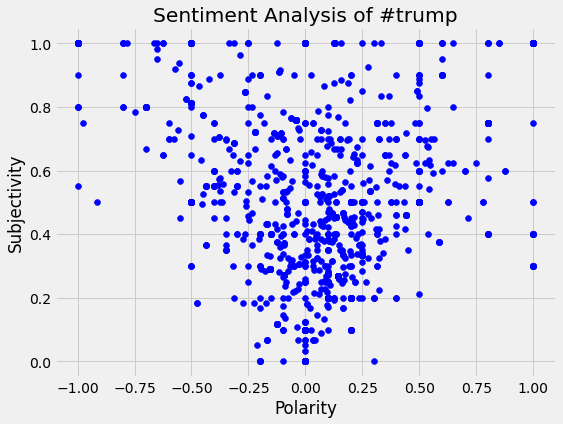

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis of #trump')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show

In [ ]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['text']

ptweets

1       UPDATE: DonaldTrump • DilatedPupils Ale • 09 S...
2        UPDATE: DonaldTrump • DilatedPupils Ale • 09 ...
3        No doubt... donaldtrump working for the wealt...
9        : “We will give you more failing schools, won...
11       : UPDATE: DonaldTrump • DilatedPupils Ale • 0...
                              ...                        
2112     : Yeah this sums up perfectly Donald Trumps t...
2128     : Success! 100s of Trump suppoers joined 2 ca...
2136    "Trump is mad the media didn’t spend more time...
2141     : New video up. A message from God, yes that ...
2165    Things I trust more than DonaldTrump — hey, I ...
Name: text, Length: 730, dtype: object

In [ ]:
Negtweets = df[df.Analysis == 'Negative']
Negtweets = Negtweets['text']

Negtweets

0        Crickets from racist, pathological liar, corr...
6        _ntd: President DonaldTrump highlighted the i...
10       : This is a must watch. BobWoodward got Donal...
13       : BREAKING: Multiple boats are either in dist...
20      Random Trump  - randomtrump trump donaldtrump ...
                              ...                        
2135    STILL trying 2 reach those FAKE TRUMP suppoers...
2137     : I am not voting for either DonaldTrump or J...
2139     : I am not voting for either DonaldTrump or J...
2160     : I am not voting for either DonaldTrump or J...
2168    WHAT A DUMB A$$!! THE Debates2020 HASNT EVEN S...
Name: text, Length: 502, dtype: object

In [ ]:
Neutweets = df[df.Analysis == 'Neutral']
Neutweets = Neutweets['text']

Neutweets

4        In the wake of DonaldTrump being caught on ta...
5       In today’s MitchellMinute I discuss how the te...
7       DonaldTrump Updates List Of Supreme Cou Candid...
8       DonaldTrump Updates List Of Supreme Cou Candid...
12      [] US whistleblower alleges censorship of Russ...
                              ...                        
2169     : Hello Twitterverse — I'll be live-tweeting ...
2170     : Hello Twitterverse — I'll be live-tweeting ...
2171     : Hey  , today’s trumpdoodletuesday sketch wa...
2172     : Hello Twitterverse — I'll be live-tweeting ...
2173     : Hello Twitterverse — I'll be live-tweeting ...
Name: text, Length: 942, dtype: object

In [ ]:
#get percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['text']

round( (ptweets.shape[0] / df.shape[0]) *100, 1)

33.6

In [ ]:
#get percentage of positive tweets
Negtweets = df[df.Analysis == 'Negative']
Negtweets = Negtweets['text']

round( (Negtweets.shape[0] / df.shape[0]) *100, 1)

23.1

In [ ]:
#get percentage of positive tweets
Neutweets = df[df.Analysis == 'Neutral']
Neutweets = Neutweets['text']

round( (Neutweets.shape[0] / df.shape[0]) *100, 1)

43.3

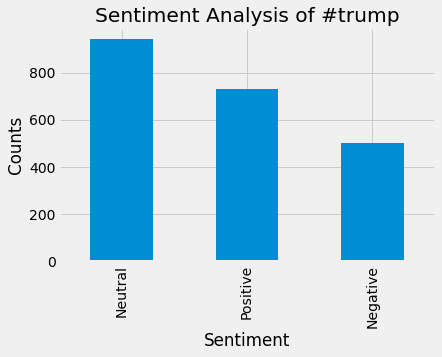

In [ ]:
# show the value count
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis of #trump')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

from nltk.stem.porter import PorterStemmer

from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score

import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Flatten, Dropout

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


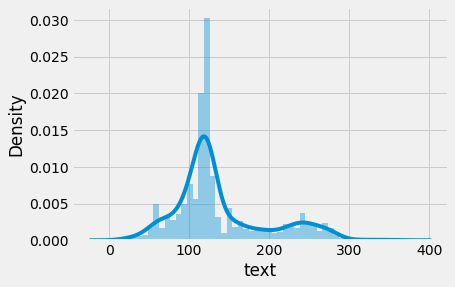

In [ ]:
# finding length of tweets
lens = df['text'].str.len()
sns.distplot(lens)

In [ ]:
def get_missings(df):
    labels,values = list(),list()
    if df.isna().sum().sum()>0:
        for column in df.columns:
            if df[column].isnull().sum():
                labels.append(column)
                values.append((df[column].isnull().sum() / len(df[column]))*100)

                #Make a dataframe 
        missings=pd.DataFrame({'Features':labels,'MissingPercent':values }).sort_values(by='MissingPercent',ascending=False)
        plt.figure(figsize=(10,6))
        sns.barplot(x=missings.Features,y=missings.MissingPercent, palette="Blues_d").set_title('Percentage of Missing Values')
        return missings
    else:
        print("There are no missing values!")
        return False

get_missings(df)

There are no missing values!


False

In [ ]:
y = df["Analysis"]

In [ ]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data


pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.


0.96

In [ ]:
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (75, 20)
y_train shape:  (75,)
X_test shape:  (25, 20)
y_test shape:  (25,)


In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)
print("Train Score:",LR.score(X_train, y_train))
print("Test Score:",LR.score(X_test, y_test))

Train Score: 1.0
Test Score: 1.0


In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)
print("Train Score:",LR.score(X_train, y_train))
print("Test Score:",LR.score(X_test, y_test))

Train Score: 1.0
Test Score: 1.0


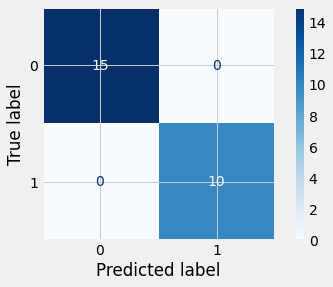

In [ ]:
cm = confusion_matrix(y_test, LR.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(y_test, LR.predict(X_test)))
print("F1 Score:", f1_score(y_test, LR.predict(X_test)))
f1_LR = f1_score(y_test, LR.predict(X_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

F1 Score: 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)
print("Train Score:",RF.score(X_train, y_train))
print("Test Score:",RF.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.84


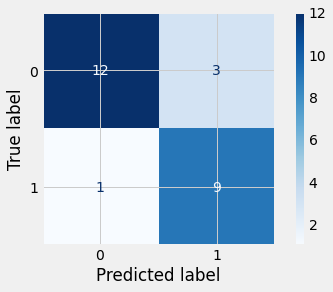

In [ ]:
cm = confusion_matrix(y_test, RF.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(y_test, RF.predict(X_test)))
print("F1 Score:", f1_score(y_test, RF.predict(X_test)))
f1_RF = f1_score(y_test, RF.predict(X_test))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.75      0.90      0.82        10

    accuracy                           0.84        25
   macro avg       0.84      0.85      0.84        25
weighted avg       0.85      0.84      0.84        25

F1 Score: 0.8181818181818182


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KN = KNeighborsClassifier()
KN.fit(X_train, y_train)
print("Train Score:",KN.score(X_train, y_train))
print("Test Score:",KN.score(X_test, y_test))

Train Score: 0.9866666666666667
Test Score: 0.8


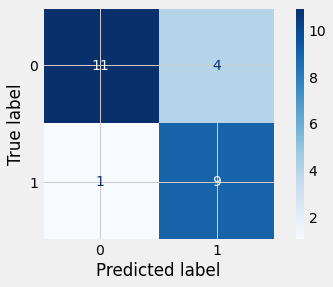

In [ ]:
cm = confusion_matrix(y_test, KN.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(y_test, KN.predict(X_test)))
print("F1 Score:", f1_score(y_test, KN.predict(X_test)))
f1_KN = f1_score(y_test, KN.predict(X_test))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.69      0.90      0.78        10

    accuracy                           0.80        25
   macro avg       0.80      0.82      0.80        25
weighted avg       0.83      0.80      0.80        25

F1 Score: 0.7826086956521738


In [ ]:
from sklearn.svm import SVC

SVM = SVC()
SVM.fit(X_train, y_train)
print("Train Score:",SVM.score(X_train, y_train))
print("Test Score:",SVM.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.92


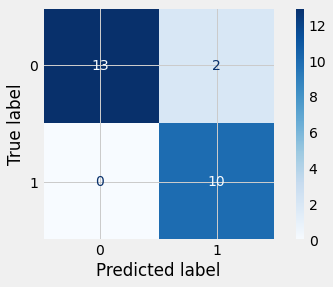

In [ ]:
cm = confusion_matrix(y_test, SVM.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(y_test, SVM.predict(X_test)))
print("F1 Score:", f1_score(y_test, SVM.predict(X_test)))
f1_SVM = f1_score(y_test, SVM.predict(X_test))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.83      1.00      0.91        10

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25

F1 Score: 0.9090909090909091


In [ ]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB.fit(X_train, y_train)
print("Train Score:",XGB.score(X_train, y_train))
print("Test Score:",XGB.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.92


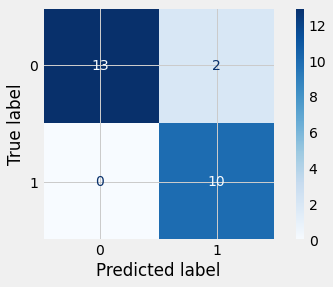

In [ ]:
cm = confusion_matrix(y_test, XGB.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(y_test, XGB.predict(X_test)))
print("F1 Score:", f1_score(y_test, XGB.predict(X_test)))
f1_XGB = f1_score(y_test, XGB.predict(X_test))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.83      1.00      0.91        10

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25

F1 Score: 0.9090909090909091


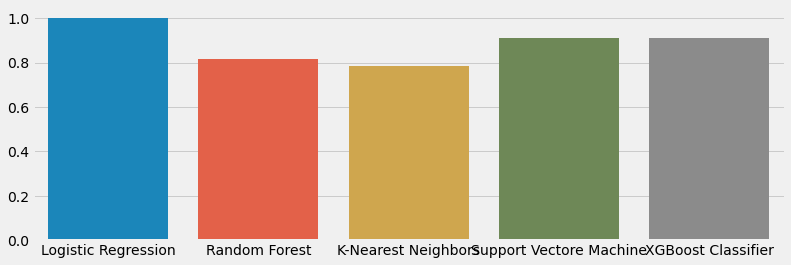

In [ ]:
models = ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors', "Support Vectore Machine", "XGBoost Classifier"]
model_f1 = [f1_LR, f1_RF, f1_KN, f1_SVM, f1_XGB]

plt.figure(figsize=(12,4))
sns.barplot(x = models, y=model_f1)